# Módulo 6 tarefa 1

#### 1) A base 'sinasc_RO_2019.csv' contém dados do sistema de nascidos vivos do DataSUS, cujo dicionário de dados está no arquivo 'Estrutura_SINASC_para_CD.pdf'. Carregue esses arquivos.

In [46]:
# importando todas as bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# leitura da base sinasc_RO_2019
sinasc_RO_2019 = pd.read_csv('SINASC_RO_2019.csv')

In [60]:
sinasc_RO_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27028 entries, 0 to 27027
Data columns (total 69 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ORIGEM        27028 non-null  int64  
 1   CODESTAB      26913 non-null  float64
 2   CODMUNNASC    27028 non-null  int64  
 3   LOCNASC       27028 non-null  int64  
 4   IDADEMAE      27028 non-null  int64  
 5   ESTCIVMAE     26711 non-null  object 
 6   ESCMAE        26716 non-null  object 
 7   CODOCUPMAE    24121 non-null  float64
 8   QTDFILVIVO    25455 non-null  float64
 9   QTDFILMORT    24930 non-null  float64
 10  CODMUNRES     27028 non-null  int64  
 11  GESTACAO      25796 non-null  object 
 12  GRAVIDEZ      26949 non-null  object 
 13  PARTO         26979 non-null  object 
 14  CONSULTAS     27028 non-null  int64  
 15  DTNASC        27028 non-null  object 
 16  HORANASC      27007 non-null  float64
 17  SEXO          27024 non-null  object 
 18  APGAR1        26932 non-nu

In [48]:
sinasc_RO_2019.head(n = 5)

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


In [54]:
# antes de criarmos os gráficos, vamos renomear os dados da coluna 'ESTCIVMAE' segundo a classificação abaixo:
#1: Solteira
#2: Casada
#3: Viúva
#4: Divorciado
#5: União consensual
#9: Ignorado
sinasc_RO_2019.loc[:,'ESTCIVMAE'] = sinasc_RO_2019.replace({1.0: 'Solteira', 2.0: 'Casada', 3.0: 'Viuva', 4.0: 'Divorciado', 5.0: 'União consensual', 9.0: 'Ignorado'})

In [56]:
sinasc_RO_2019.head(n = 5)

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,União consensual,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,Casada,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,Ignorado,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,União consensual,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,Casada,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


####  2) Monte um gráficos de barras com as variáveis APGAR1, APGAR5, SEXO, GESTACAO, ESTCIVMAE.

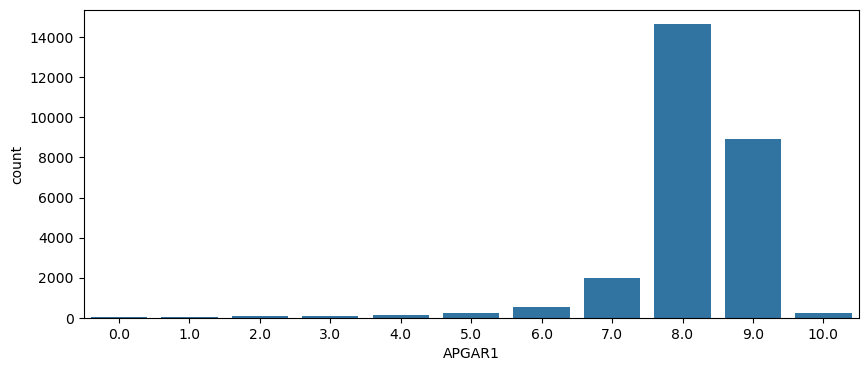

In [36]:
# ajuste comprimento e lagura do gráfico
fig = plt.figure(figsize = (10, 4))
# método .countplot para criar gráfico de barras da variável 'APGAR1'
barra_apgar1 = sns.countplot(data = sinasc_RO_2019, x = 'APGAR1')

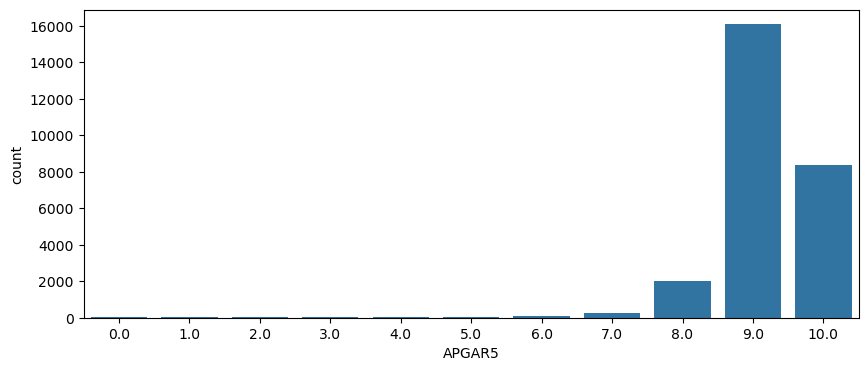

In [38]:
# ajuste comprimento e lagura do gráfico
fig = plt.figure(figsize = (10, 4))
# método .countplot para criar gráfico de barras da variável 'APGAR5'
barra_apgar5 = sns.countplot(data = sinasc_RO_2019, x = 'APGAR5')

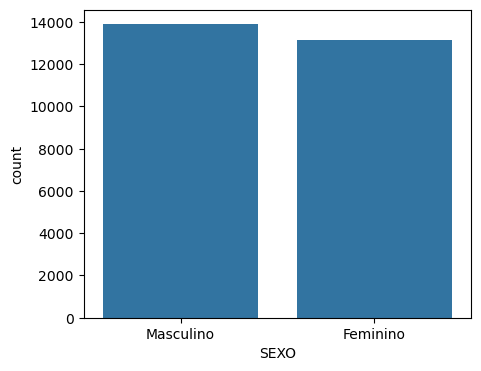

In [40]:
# ajuste comprimento e lagura do gráfico
fig = plt.figure(figsize = (5, 4))
# método .countplot para criar gráfico de barras da variável 'SEXO'
barra_sexo = sns.countplot(data = sinasc_RO_2019, x = 'SEXO')

C:\Users\Leonardo Bariani\AppData\Local\Temp\ipykernel_55356\3392076885.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  barra_gestacao.set_xticklabels(barra_gestacao.get_xticklabels(), rotation = 45)


[Text(0, 0, '37 a 41 semanas'),
 Text(1, 0, '42 semanas e mais'),
 Text(2, 0, '32 a 36 semanas'),
 Text(3, 0, '22 a 27 semanas'),
 Text(4, 0, '28 a 31 semanas'),
 Text(5, 0, 'Menos de 22 semanas')]

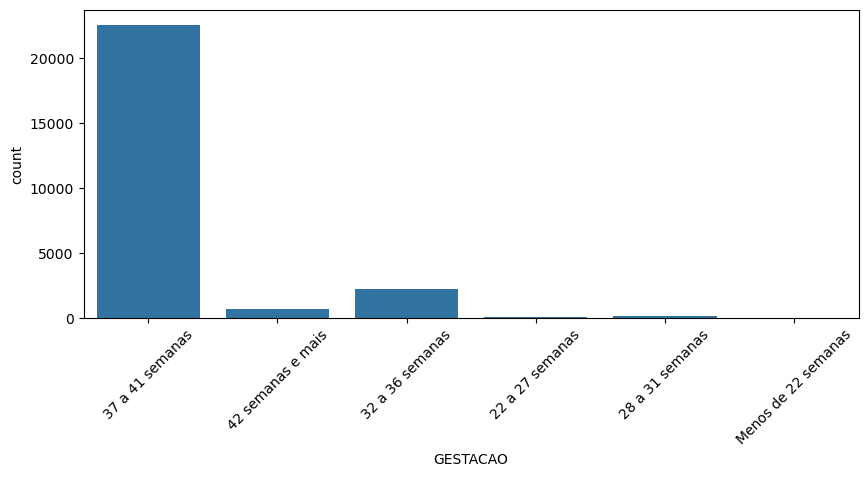

In [42]:
# ajuste comprimento e lagura do gráfico
fig = plt.figure(figsize = (10, 4))
# método .countplot para criar gráfico de barras da variável 'GESTACAO'
barra_gestacao = sns.countplot(data = sinasc_RO_2019, x = 'GESTACAO')
# ajuste na rotação dos títulos do eixo x
barra_gestacao.set_xticklabels(barra_gestacao.get_xticklabels(), rotation = 45)

C:\Users\Leonardo Bariani\AppData\Local\Temp\ipykernel_55356\3308638462.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  barra_estado_civil.set_xticklabels(barra_estado_civil.get_xticklabels(), rotation = 45)


[Text(0, 0, 'União consensual'),
 Text(1, 0, 'Casada'),
 Text(2, 0, 'Ignorado'),
 Text(3, 0, 'Solteira'),
 Text(4, 0, 'Viuva')]

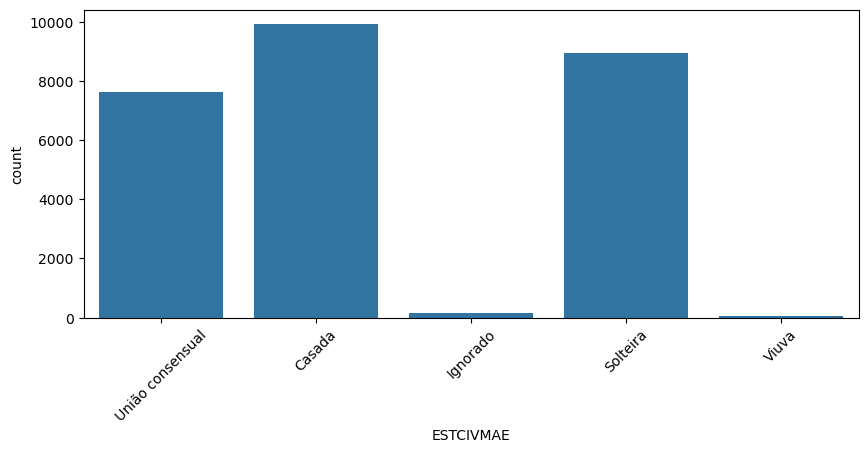

In [58]:
# ajuste comprimento e lagura do gráfico
fig = plt.figure(figsize = (10, 4))
# método .countplot para criar gráfico de barras da variável 'ESTCIVMAE'
barra_estado_civil = sns.countplot(data = sinasc_RO_2019, x = 'ESTCIVMAE')
# ajuste na rotação dos títulos do eixo x
barra_estado_civil.set_xticklabels(barra_estado_civil.get_xticklabels(), rotation = 45)

#### 3) Monte um gráfico de barras mostrando o APGAR5 médio por CONSULTAS

In [64]:
print("Quantidade de consultas na base: ", sinasc_RO_2019['CONSULTAS'].unique())

# antes de criarmos o gráfico, vamos renomear os dados da coluna 'CONSULTAS' segundo a classificação abaixo:
#1: Nenhuma
#2: De 1 a 3
#3: De 4 a 6
#4: 7 e mais
#9: Ignorado
sinasc_RO_2019.loc[:,'CONSULTAS'] = sinasc_RO_2019.replace({1: 'Nenhuma', 2: 'De 1 a 3', 3: 'De 4 a 6', 4: '7 e mais', 9: 'Ignorado'})

Quantidade de consultas na base:  [4 3 2 1 9]


C:\Users\Leonardo Bariani\AppData\Local\Temp\ipykernel_55356\1963634989.py:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['7 e mais' '7 e mais' '7 e mais' ... '7 e mais' '7 e mais' '7 e mais']' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  sinasc_RO_2019.loc[:,'CONSULTAS'] = sinasc_RO_2019.replace({1: 'Nenhuma', 2: 'De 1 a 3', 3: 'De 4 a 6', 4: '7 e mais', 9: 'Ignorado'})


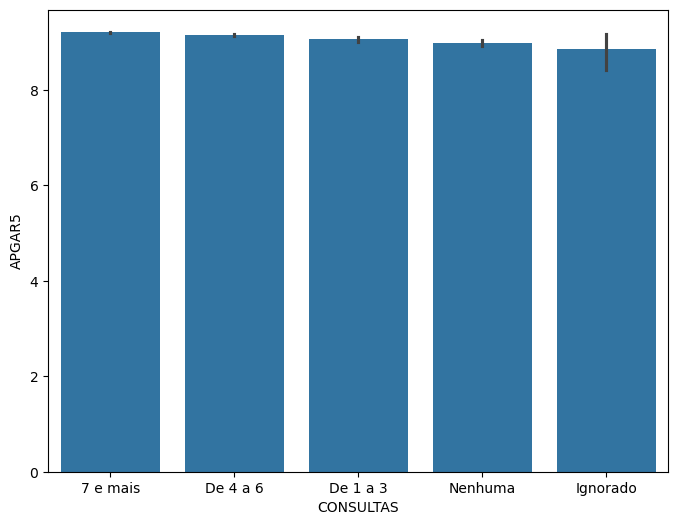

In [82]:
# ajuste comprimento e lagura do gráfico
fig = plt.figure(figsize = (8, 6))
# método .barplot para agregar alguma estatísitca de referência (por default, temos a média) dos dados da coluna apgar5 por consulta
barra_consulta_apgar5 = sns.barplot(x = 'CONSULTAS', y='APGAR5', data = sinasc_RO_2019)

In [90]:
# validação do resultado do gráfico acima num dataframe com as médias do 'APGAR5' por quantidade de consultas
sinasc_RO_2019_media_apgar5_consulta = sinasc_RO_2019.groupby(['CONSULTAS'], as_index = False)['APGAR5'].mean()
sinasc_RO_2019_media_apgar5_consulta

,CONSULTAS,APGAR5
0,7 e mais,9.207188
1,De 1 a 3,9.057395
2,De 4 a 6,9.154440
3,Ignorado,8.860000
4,Nenhuma,8.981481


####  4) Monte um painel com 4 gráficos mostrando as frequencias de SEXO, GESTACAO, ESTCIVMAE e CONSULTAS

<Axes: xlabel='GESTACAO', ylabel='count'>

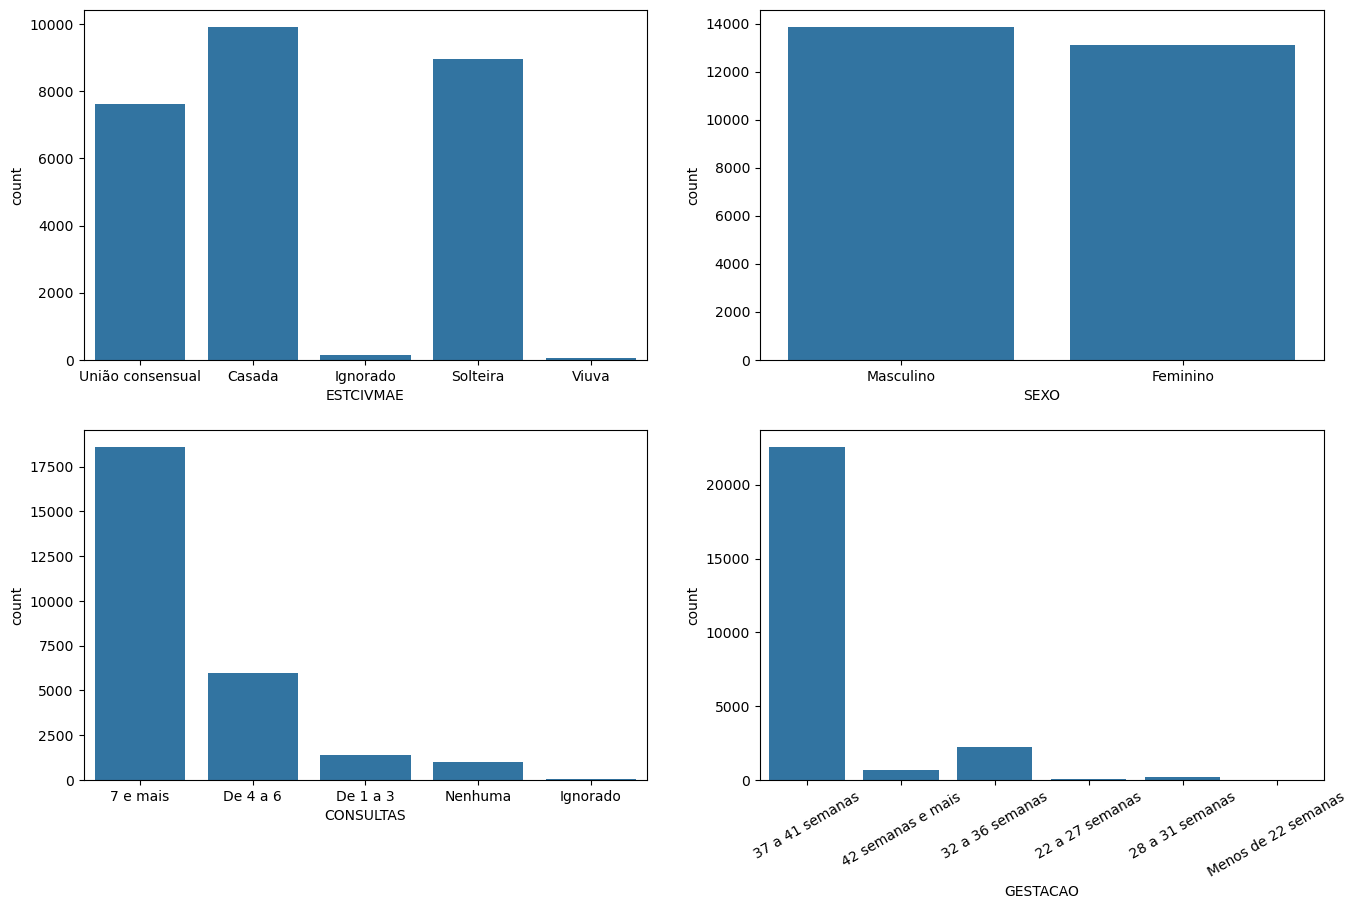

In [118]:
# configuração da quantidade de figuras e o tamanho x,y
plt.rc('figure', figsize = (16, 10))
fig, axes = plt.subplots(2, 2)
plt.xticks(rotation = 30)

# método .countplot() para criação de gráficos de colunas (soma das variáveis no eixo y) 
# data = base de dados; x = variável no eixo y; axes = posição dos gráficos na figura abaixo
sns.countplot(ax = axes[0, 0], x = 'ESTCIVMAE', data = sinasc_RO_2019)
sns.countplot(ax = axes[0, 1], x = 'SEXO', data = sinasc_RO_2019)
sns.countplot(ax = axes[1, 0], x = 'CONSULTAS', data = sinasc_RO_2019)
sns.countplot(ax = axes[1, 1], x = 'GESTACAO', data = sinasc_RO_2019)